In [1]:
import numpy as np

# options: vgg19, resnet50, xception, inception_resnet_v2, 
which_model = 'inception_resnet_v2'
model_path = './saved_models/model_trained_on_'+which_model+'_features.h5'

features_dir = './features/'+which_model+'/'
# load features
train_features = np.load(features_dir+'train_features.npy')
validation_features = np.load(features_dir+'validation_features.npy')
train_labels = np.load(features_dir+'train_labels.npy')
validation_labels = np.load(features_dir+'validation_labels.npy')


print('train features: ', train_features.shape)
print('validation features: ', validation_features.shape)
print('train labels: ', train_labels.shape)
print('validation labels: ', validation_labels.shape)


train features:  (7000, 8, 5, 1536)
validation features:  (3000, 8, 5, 1536)
train labels:  (7000, 120)
validation labels:  (3000, 120)


In [2]:
import os
import keras
from keras import models
from keras import layers
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras import optimizers
from keras import regularizers

EPOCHS = 60
BATCH_SIZE = 64

model = models.Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax'))
model.summary()


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 61440)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61440)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 61440)             245760    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               15728896  
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
__________

In [4]:
opt = optimizers.Adam(lr=1e-5)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=model_path,
        monitor='val_acc',
        save_best_only=True
    )
]
if os.path.isfile(model_path):
    model.load_weights(model_path)

history = model.fit(train_features, train_labels,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks,
                    validation_data=(validation_features, validation_labels))



Train on 7000 samples, validate on 3000 samples
Epoch 1/60
7000/7000 [==============================] - 6s 808us/step - loss: 8.4458 - acc: 0.7754 - val_loss: 7.4989 - val_acc: 0.8393
Epoch 2/60
7000/7000 [==============================] - 4s 564us/step - loss: 6.9628 - acc: 0.8146 - val_loss: 6.2802 - val_acc: 0.8517
Epoch 3/60
7000/7000 [==============================] - 4s 570us/step - loss: 5.8355 - acc: 0.8323 - val_loss: 5.3175 - val_acc: 0.8533
Epoch 4/60
7000/7000 [==============================] - 4s 568us/step - loss: 4.9440 - acc: 0.8459 - val_loss: 4.5561 - val_acc: 0.8577
Epoch 5/60
7000/7000 [==============================] - 4s 577us/step - loss: 4.2355 - acc: 0.8529 - val_loss: 3.9470 - val_acc: 0.8597
Epoch 6/60
7000/7000 [==============================] - 4s 570us/step - loss: 3.6614 - acc: 0.8654 - val_loss: 3.4594 - val_acc: 0.8570
Epoch 7/60
7000/7000 [==============================] - 4s 569us/step - loss: 3.2064 - acc: 0.8701 - val_loss: 3.0680 - val_acc: 0.8590


7000/7000 [==============================] - 4s 558us/step - loss: 0.3900 - acc: 0.9893 - val_loss: 0.8319 - val_acc: 0.8633


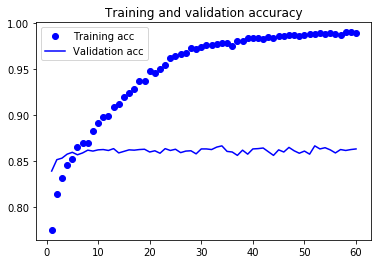

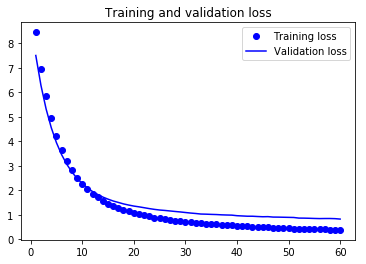

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()